In [1]:
# Load Libraries 
from scipy.ndimage import center_of_mass
from helper_functions import isolate_dart_tip
from dartboard_images import DartboardImage
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:

# load images and get current dir

#cur_dir = os.path.dirname(os.path.realpath(__file__))
cur_dir = os.getcwd()
parent_dir = os.path.dirname(cur_dir)
print(cur_dir)
print(parent_dir)
nodart = cv2.imread(os.path.join(parent_dir, 'images', '25.jpg'))
dart = cv2.imread(os.path.join(parent_dir, 'images', '30.jpg'))

/Users/zach/Desktop/SDP/SmokingDartsv2/core
/Users/zach/Desktop/SDP/SmokingDartsv2


coordinates:  1343.7974683544303 475.38607594936707


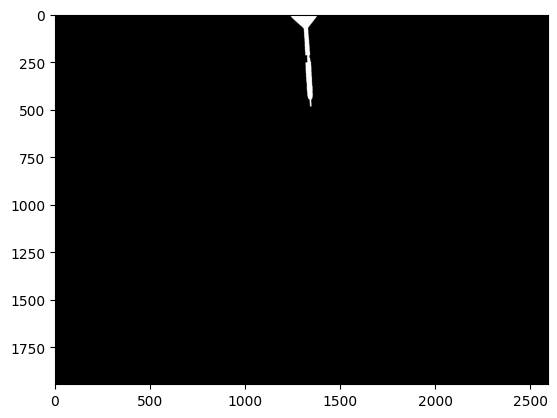

In [6]:

# db
db = DartboardImage("x", dart, last_img=nodart)
diff = db.get_diff_to_last_img()

# crop image bottom half
# diff = diff[3*diff.shape[0]//4:, :]

# set top half to 0
diff[:3*diff.shape[0]//4, :] = 0

# flip image
diff = cv2.flip(diff, 0)

# opencv dilation
kernel = np.ones((5,5),np.uint8)
diff = cv2.dilate(diff.astype('uint8'),kernel,iterations = 1)

# opencv erosion
kernel = np.ones((5,5),np.uint8)
diff = cv2.erode(diff.astype('uint8'),kernel,iterations = 1)

# get the tip
isolated_dart_tip = isolate_dart_tip(diff)
y_coordinate, x_coordinate = center_of_mass(isolated_dart_tip)
print("coordinates: ", x_coordinate, y_coordinate)

# show image diff
plt.imshow(diff, cmap='gray')
#plt.imshow(diff, cmap='norm')
# plt.imshow(isolated_dart_tip, cmap='gray')
plt.show()